In [47]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import train_test_split

In [35]:
model = EfficientNetB0(weights='imagenet')

In [36]:
img_path = 'https___cdn.cnn.com_cnnnext_dam_assets_210819083630-hurricane-grace-satellite-8am-et-081921.jpg'
#img_path = '_117586678_iota_goes_2020321_lrg.jpg'

In [37]:
img = image.load_img(img_path,target_size=(224,224))

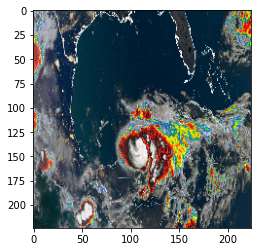

In [38]:
plt.imshow(img)

In [39]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

In [40]:
preds = model.predict(x)

In [45]:
print('Predicted:', decode_predictions(preds, top=10)[0])

Predicted: [('n01955084', 'chiton', 0.1497708), ('n09472597', 'volcano', 0.09441081), ('n01986214', 'hermit_crab', 0.072216995), ('n09246464', 'cliff', 0.051110934), ('n01978455', 'rock_crab', 0.047357447), ('n01910747', 'jellyfish', 0.031410344), ('n02317335', 'starfish', 0.018891193), ('n02321529', 'sea_cucumber', 0.014578256), ('n01930112', 'nematode', 0.0141516775), ('n04606251', 'wreck', 0.008941129)]


**Load file names**

In [ ]:
df = pd.read_csv('files.csv')

In [ ]:
df_train,df_test = train_test_split(df,test_size=0.1,random_state=42)

**Data structure for training and test data**

In [ ]:
train_gen = ImageDataGenerator(validation_split=0.1)
test_gen = ImageDataGenerator()

train_data = train_gen.flow_from_dataframe(
    dataframe = df_train,
    x_col = 'file',
    y_col = 'target',
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'binary',
    shuffle = True,
    subset = 'training',
    batch_size=100
)

val_data = train_gen.flow_from_dataframe(
    dataframe = df_train,
    x_col = 'file',
    y_col = 'target',
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'binary',
    shuffle = False,
    subset = 'validation',
    batch_size=100
)

test_data = test_gen.flow_from_dataframe(
    dataframe = df_test,
    x_col = 'file',
    y_col = 'target',
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'binary',
    shuffle = False,
    batch_size=100
)

**Model**

In [ ]:
model = tf.keras.Sequential([
        keras.layers.InputLayer(input_shape=(224,224,3)),
        keras.layers.Conv2D(3,3,activation='relu',padding='same'),
        EfficientNetB0(include_top=False,input_shape=(),weights='imagenet'),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(32,activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')])

model.compile(
    optimizer=tf.optimizers.Adam(lr=0.000001),
    loss='binary_crossentropy',
    metrics=['accuracy','Recall'])
model.summary()